In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KULIAH/SMT5/ML/ProjectUAS/heart.csv')
# df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projek UAS/dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute information: 
1. age in years
2. sex (1 = male, 0 = female)
3. chest pain type (4 values)
4. resting blood pressure - resting blood pressure (in mm Hg on admission to the hospital) 
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## Correlation Matrix

Text(0.5, 1.0, 'Correlation between different fearures')

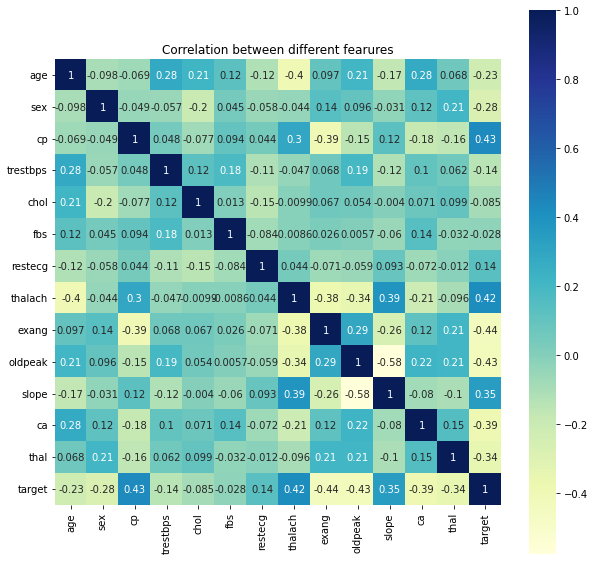

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu')

plt.title('Correlation between different fearures')

# Data Preprocessing

## One Hot Encoding

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
  if len(df[column].unique()) <= 10:
    categorical_val.append(column)
  else:
    continous_val.append(column)

print(categorical_val)
print(continous_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
categorical_val.remove('target')
df = pd.get_dummies(df, columns=categorical_val)

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## Standardization

In [ ]:
scaler = StandardScaler()
df[continous_val] = scaler.fit_transform(df[continous_val])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


# Model Building

In [ ]:
X = df.drop('target', axis=1)
y = df.target

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df_model = pd.DataFrame(columns=['Algorithm', 'Accuracy Training(%)', 'Accuracy Testing(%)','F1 Score Training(%)','F1 Score Testing(%)'])

## Logistric Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(xtrain, ytrain)

test_acc = accuracy_score(ytest, lr_clf.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, lr_clf.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, lr_clf.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, lr_clf.predict(xtrain)) * 100

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')

df_model = df_model.append({'Algorithm':'Logistic Regression','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score},ignore_index=True)

Train accuracy = 86.79 %
Test accuracy = 85.71 %
Train f1_score = 88.14 %
Test f1_score = 87.38 %


##KNearestNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain.values.ravel())
ypred = knn.predict(xtest)

test_acc = accuracy_score(ytest, knn.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, knn.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, knn.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, knn.predict(xtrain)) * 100

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')

df_model = df_model.append({'Algorithm':'KNN','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score},ignore_index=True)

Train accuracy = 86.79 %
Test accuracy = 86.81 %
Train f1_score = 87.93 %
Test f1_score = 88.00 %


##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain.values.ravel())

test_acc = accuracy_score(ytest, rf.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, rf.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, rf.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, rf.predict(xtrain)) * 100

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')

df_model = df_model.append({'Algorithm':'Random Forest','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score},ignore_index=True)

Train accuracy = 100.00 %
Test accuracy = 82.42 %
Train f1_score = 100.00 %
Test f1_score = 84.00 %


##Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='adam', activation='relu')
ann.fit(xtrain,ytrain.values.ravel())

test_acc = accuracy_score(ytest, ann.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, ann.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, ann.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, ann.predict(xtrain)) * 100

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')

df_model = df_model.append({'Algorithm':'ANN','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score},ignore_index=True)

Train accuracy = 94.34 %
Test accuracy = 86.81 %
Train f1_score = 94.83 %
Test f1_score = 88.46 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain.values.ravel())

test_acc = accuracy_score(ytest, gnb.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, gnb.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, gnb.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, gnb.predict(xtrain)) * 100

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')

df_model = df_model.append({'Algorithm':'Naive Bayes','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score},ignore_index=True)

Train accuracy = 77.36 %
Test accuracy = 68.13 %
Train f1_score = 75.00 %
Test f1_score = 63.29 %


In [ ]:
df_model

,Algorithm,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%)
0,Logistic Regression,86.79,85.71,88.14,87.38
1,KNN,86.79,86.81,87.93,88.00
2,Random Forest,100.00,82.42,100.00,84.00
3,ANN,94.34,86.81,94.83,88.46
4,Naive Bayes,77.36,68.13,75.00,63.29


# Hyper Parameter Tuning

In [ ]:
df_model_hypertuning = pd.DataFrame(columns=['Algorithm', 'Accuracy Training(%)', 'Accuracy Testing(%)','F1 Score Training(%)','F1 Score Testing(%)','Avg Perfomance'])

##Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(xtrain,ytrain)

test_acc = accuracy_score(ytest, lr.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, lr.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, lr.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, lr.predict(xtrain)) * 100
avg= (test_acc + test_f1_score)/2


print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')
print(f'Average Perfomance = {avg} %')

Train accuracy = 86.79 %
Test accuracy = 86.81 %
Train f1_score = 88.14 %
Test f1_score = 88.24 %
Average Perfomance = 87.52424046541694 %


In [ ]:
df_model_hypertuning = df_model_hypertuning.append({'Algorithm':'Tuned Logistic Regression','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score,'Avg Perfomance':avg},ignore_index=True)

##KNearestNeighbors

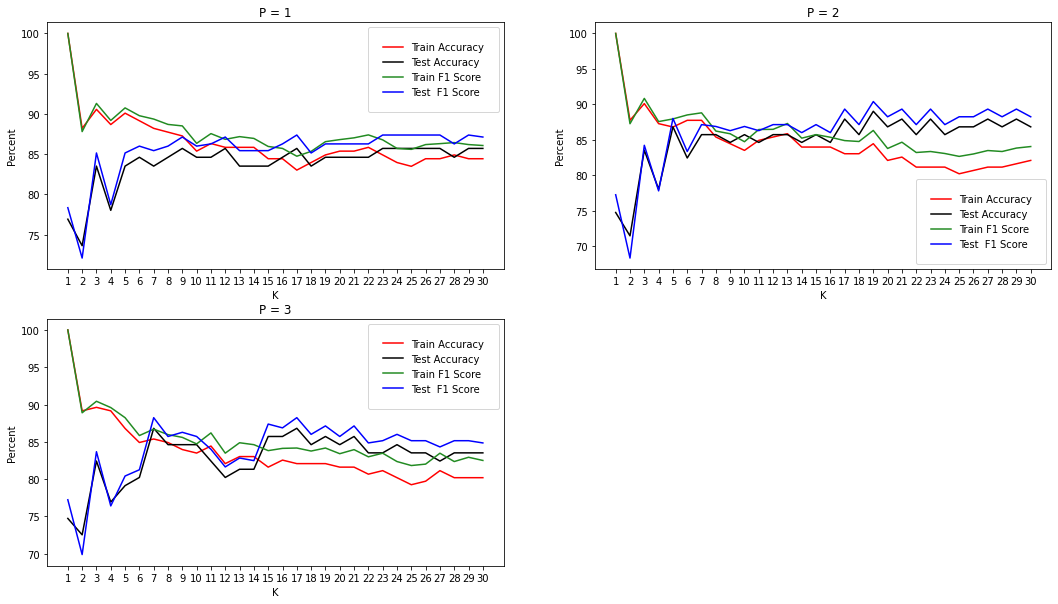

In [ ]:
plt.figure(figsize=(18,10))
best_train_acc = 0
best_test_acc = 0
best_f1_train = 0
best_f1_test = 0
best_k =0 
best_p = 0
for p in range(1,4):
  acc_train = []
  acc_test = []
  f1_train = []
  f1_test = []

  for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, p=p)
    knn.fit(xtrain,ytrain.values.ravel())
    ypred = knn.predict(xtest)

    test_acc = accuracy_score(ytest, knn.predict(xtest)) * 100
    train_acc = accuracy_score(ytrain, knn.predict(xtrain)) * 100
    test_f1_score = f1_score(ytest, knn.predict(xtest)) * 100
    train_f1_score = f1_score(ytrain, knn.predict(xtrain)) * 100
    
    acc_test.append(test_acc)
    acc_train.append(train_acc)
    f1_test.append(test_f1_score)
    f1_train.append(train_f1_score)
    
    if test_acc > best_test_acc:
      best_test_acc = test_acc
      best_train_acc = train_acc
      best_f1_train = train_f1_score
      best_f1_test = test_f1_score
      best_k = k
      best_p = p
    elif test_acc >= best_test_acc:
      if test_f1_score > best_f1_test:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_f1_train = train_f1_score
        best_f1_test = test_f1_score
        best_k = k
        best_p = p

  plt.subplot(2,2,p)
  plt.title(f'P = {p}')
  plt.plot(range(1,31),acc_train, label='Train Accuracy',color='red')
  plt.plot(range(1,31),acc_test, label='Test Accuracy',color='black')
  plt.plot(range(1,31),f1_train, label='Train F1 Score',color='forestgreen')
  plt.plot(range(1,31),f1_test, label='Test  F1 Score',color='blue')
  plt.xticks(range(1,31))
  plt.xlabel('K')
  plt.ylabel('Percent')
  plt.legend(borderpad=1.5, labelspacing=0.5)

plt.show()



In [ ]:
avg= (best_test_acc + best_f1_test)/2
print(f'Best K = {best_k} and best_p = {best_p}')
print(f'Train accuracy = {best_train_acc *1:.2f} %')
print(f'Test accuracy = {best_test_acc *1:.2f} %')
print(f'Train f1_score = {best_f1_train *1:.2f} %')
print(f'Test f1_score = {best_f1_test *1:.2f} %')
print(f'Average Perfomance = {avg} %')

Best K = 19 and best_p = 2
Train accuracy = 84.43 %
Test accuracy = 89.01 %
Train f1_score = 86.31 %
Test f1_score = 90.38 %
Average Perfomance = 89.69780219780219 %


In [ ]:
df_model_hypertuning = df_model_hypertuning.append({'Algorithm':'Tuned KNN','Accuracy Training(%)':best_train_acc,'Accuracy Testing(%)':best_test_acc,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)

##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100,random_state=0)
rf.fit(xtrain,ytrain.values.ravel())

test_acc = accuracy_score(ytest, rf.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, rf.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, rf.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, rf.predict(xtrain)) * 100
avg= (test_acc + test_f1_score)/2

print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')
print(f'Average Perfomance = {avg} %')

Train accuracy = 100.00 %
Test accuracy = 84.62 %
Train f1_score = 100.00 %
Test f1_score = 86.00 %
Average Perfomance = 85.30769230769229 %


In [ ]:
df_model_hypertuning = df_model_hypertuning.append({'Algorithm':'Tuned Random Forest','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score,'Avg Perfomance':avg},ignore_index=True)

##NeuralNetwork

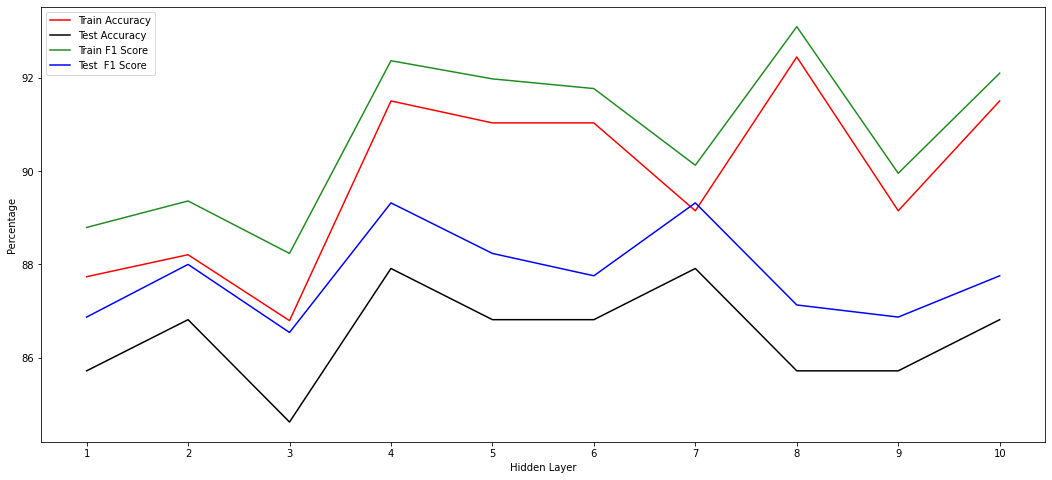

best acc test = 87.91208791208791
best acc train = 92.45283018867924
best f1 train = 93.10344827586208
best f1 test = 89.32038834951457
best n hidden layer 4
Average Perfomance = 88.61623813080124 %


In [ ]:
plt.figure(figsize=(18,8))
acc_train = []
acc_test = []
f1_train = []
f1_test = []
rs = []
for nh in range(1,11):
  ann = MLPClassifier(hidden_layer_sizes=nh, max_iter=2000, random_state=2)
  ann.fit(xtrain,ytrain.values.ravel())

  test_acc = accuracy_score(ytest, ann.predict(xtest)) * 100
  train_acc = accuracy_score(ytrain, ann.predict(xtrain)) * 100
  test_f1_score = f1_score(ytest, ann.predict(xtest)) * 100
  train_f1_score = f1_score(ytrain, ann.predict(xtrain)) * 100

  acc_test.append(test_acc)
  acc_train.append(train_acc)
  f1_test.append(test_f1_score)
  f1_train.append(train_f1_score)

plt.plot(range(1,11),acc_train, label='Train Accuracy',color='red')
plt.plot(range(1,11),acc_test, label='Test Accuracy',color='black')
plt.plot(range(1,11),f1_train, label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),f1_test, label='Test  F1 Score',color='blue')
plt.xticks(range(1,11))
plt.xlabel('Hidden Layer')
plt.ylabel('Percentage')
plt.legend()
plt.show()

best_acc_test = acc_test[np.argmax(acc_test)]
best_acc_train = acc_train[np.argmax(acc_train)]
best_f1_train = f1_train[np.argmax(f1_train)]
best_f1_test = f1_test[np.argmax(f1_test)]
best_nh = np.argmax(acc_test) + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best acc test = {best_acc_test}')
print(f'best acc train = {best_acc_train}')
print(f'best f1 train = {best_f1_train}')
print(f'best f1 test = {best_f1_test}')
print(f'best n hidden layer {best_nh}')
print(f'Average Perfomance = {avg} %')

In [ ]:
df_model_hypertuning = df_model_hypertuning.append({'Algorithm':'Tuned ANN','Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)

##Naive Bayes

In [ ]:
gnb = GaussianNB(var_smoothing=0.02310129700083159)
gnb.fit(xtrain,ytrain)

test_acc = accuracy_score(ytest, gnb.predict(xtest)) * 100
train_acc = accuracy_score(ytrain, gnb.predict(xtrain)) * 100
test_f1_score = f1_score(ytest, gnb.predict(xtest)) * 100
train_f1_score = f1_score(ytrain, gnb.predict(xtrain)) * 100
avg= (test_acc + test_f1_score)/2
print(f'Train accuracy = {train_acc *1:.2f} %')
print(f'Test accuracy = {test_acc *1:.2f} %')
print(f'Train f1_score = {train_f1_score *1:.2f} %')
print(f'Test f1_score = {test_f1_score *1:.2f} %')
print(f'Average Perfomance = {avg} %')

Train accuracy = 85.38 %
Test accuracy = 84.62 %
Train f1_score = 86.81 %
Test f1_score = 86.00 %
Average Perfomance = 85.30769230769229 %


In [ ]:
df_model_hypertuning = df_model_hypertuning.append({'Algorithm':'Tuned Naive Bayes','Accuracy Training(%)':train_acc,'Accuracy Testing(%)':test_acc,
                  'F1 Score Training(%)':train_f1_score,'F1 Score Testing(%)':test_f1_score,'Avg Perfomance':avg},ignore_index=True)

In [ ]:
df_model_hypertuning = df_model_hypertuning.sort_values(by=['Accuracy Testing(%)'], ascending=False)

#Hypertuning with dimentionality reduction

In [ ]:
from sklearn.decomposition import PCA
df_model_pca = pd.DataFrame(columns=['Algorithm','Best PCs', 'Accuracy Training(%)', 'Accuracy Testing(%)','F1 Score Training(%)','F1 Score Testing(%)','Avg Perfomance'])

##Logistic Regression

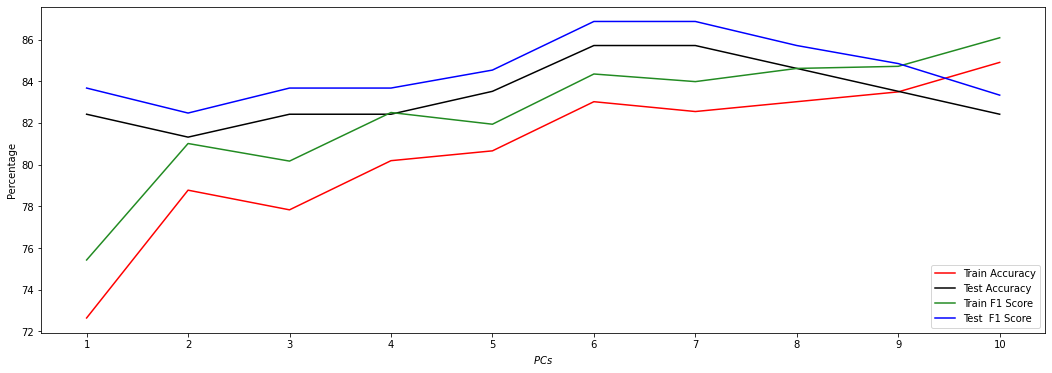

best  acc test = 85.71428571428571
best  acc train = 83.01886792452831
best  f1 train = 84.34782608695653
best  f1 test = 86.86868686868686
best PCs 6
Average Perfomance = 86.29148629148628 %


In [ ]:
plt.figure(figsize=(18,6))
acc_train = []
acc_test = []
f1_train = []
f1_test = []

for i in range(1,11):
  pca = PCA(i)
  ztrain = pca.fit_transform(xtrain)
  ztest = pca.transform(xtest)

  lr_clf = LogisticRegression(solver='liblinear')
  lr_clf.fit(ztrain,ytrain)

  test_acc = accuracy_score(ytest, lr_clf.predict(ztest)) * 100
  train_acc = accuracy_score(ytrain, lr_clf.predict(ztrain)) * 100
  test_f1_score = f1_score(ytest, lr_clf.predict(ztest)) * 100
  train_f1_score = f1_score(ytrain, lr_clf.predict(ztrain)) * 100

  acc_test.append(test_acc)
  acc_train.append(train_acc)
  f1_test.append(test_f1_score)
  f1_train.append(train_f1_score)

plt.plot(range(1,11),acc_train, label='Train Accuracy',color='red')
plt.plot(range(1,11),acc_test, label='Test Accuracy',color='black')
plt.plot(range(1,11),f1_train, label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),f1_test, label='Test  F1 Score',color='blue')
plt.xticks(range(1,11))
plt.legend(loc='lower right')
plt.xlabel('$PCs$')
plt.ylabel('Percentage')
plt.show()
best_acc_test = acc_test[np.argmax(acc_test)]
best_acc_train = acc_train[np.argmax(acc_test)]
best_f1_train = f1_train[np.argmax(acc_test)]
best_f1_test = f1_test[np.argmax(acc_test)]
best_pcs = np.argmax(acc_test) + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best  acc test = {best_acc_test}')
print(f'best  acc train = {best_acc_train}')
print(f'best  f1 train = {best_f1_train}')
print(f'best  f1 test = {best_f1_test}')
print(f'best PCs {best_pcs}')
print(f'Average Perfomance = {avg} %')

In [ ]:
df_model_pca = df_model_pca.append({'Algorithm':'Reducted Logistic','Best PCs':best_pcs,'Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)
df_model_pca

,Algorithm,Best PCs,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
0,Reducted Logistic,6,83.02,85.71,84.35,86.87,86.29


##KNearestNeighbors

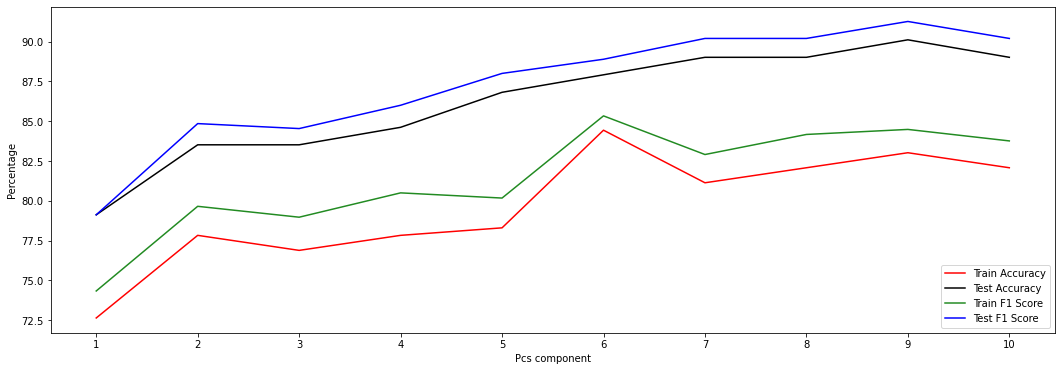

In [ ]:
plt.figure(figsize=(18,6))
best_eval = pd.DataFrame()
for i in range(1,11):
  evaluation = pd.DataFrame()

  pca = PCA(i)
  ztrain = pca.fit_transform(xtrain)
  ztest = pca.transform(xtest)

  for p in range(1,4):
    for k in range(1,31):
      knn = KNeighborsClassifier(n_neighbors=k,p=p)
      knn.fit(ztrain,ytrain)

      test_acc = accuracy_score(ytest, knn.predict(ztest)) * 100
      train_acc = accuracy_score(ytrain, knn.predict(ztrain)) * 100
      test_f1_score = f1_score(ytest, knn.predict(ztest)) * 100
      train_f1_score = f1_score(ytrain, knn.predict(ztrain)) * 100

      d = {'train_acc':train_acc,'test_acc':test_acc,'f1_train':train_f1_score,'f1_test':test_f1_score,'k':k,'p':p}
      evaluation = evaluation.append(d,ignore_index=True)
  max_test_acc = evaluation['test_acc']
  best_eval = best_eval.append(evaluation.iloc[max_test_acc.idxmax()],ignore_index=True)
  
plt.plot(range(1,11),best_eval['train_acc'], label='Train Accuracy',color='red')
plt.plot(range(1,11),best_eval['test_acc'], label='Test Accuracy',color='black')
plt.plot(range(1,11),best_eval['f1_train'], label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),best_eval['f1_test'], label='Test F1 Score',color='blue')
plt.xticks(range(1,11))
plt.legend(loc='lower right')
plt.xlabel('Pcs component')
plt.ylabel('Percentage')
plt.show()


In [ ]:
df = best_eval.iloc[best_eval['test_acc'].idxmax()]
best_acc_test = df['test_acc']
best_acc_train = df['train_acc']
best_f1_train = df['f1_train']
best_f1_test = df['f1_test']
best_pcs = best_eval['test_acc'].idxmax() + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best PCs {best_pcs}')
print(f'best  acc test = {best_acc_test} %')
print(f'best  acc train = {best_acc_train} %')
print(f'best  f1 train = {best_f1_train} %')
print(f'best  f1 test = {best_f1_test} %')
print(f"k = {int(df['k'])} p = {int(df['p'])}")
print(f'Average Perfomance = {avg} %')

best PCs 9
best  acc test = 90.10989010989012 %
best  acc train = 83.01886792452831 %
best  f1 train = 84.48275862068965 %
best  f1 test = 91.2621359223301 %
k = 7 p = 1
Average Perfomance = 90.68601301611011 %


In [ ]:
df_model_pca = df_model_pca.append({'Algorithm':'Reducted KNN','Best PCs':best_pcs,'Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)
df_model_pca

,Algorithm,Best PCs,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
0,Reducted Logistic,6,83.02,85.71,84.35,86.87,86.29
1,Reducted KNN,9,83.02,90.11,84.48,91.26,90.69


##Random Forest

In [ ]:
evaluation = pd.DataFrame()
for i in range(1,11):
  pca = PCA(i)
  ztrain = pca.fit_transform(xtrain)
  ztest = pca.transform(xtest)

  rf = RandomForestClassifier(max_depth=100,random_state=0)
  rf.fit(ztrain,ytrain)

  test_acc = accuracy_score(ytest, rf.predict(ztest)) * 100
  train_acc = accuracy_score(ytrain, rf.predict(ztrain)) * 100
  test_f1_score = f1_score(ytest, rf.predict(ztest)) * 100
  train_f1_score = f1_score(ytrain, rf.predict(ztrain)) * 100

  d = {'train_acc':train_acc,'test_acc':test_acc,'f1_train':train_f1_score,'f1_test':test_f1_score}
  evaluation = evaluation.append(d,ignore_index=True)

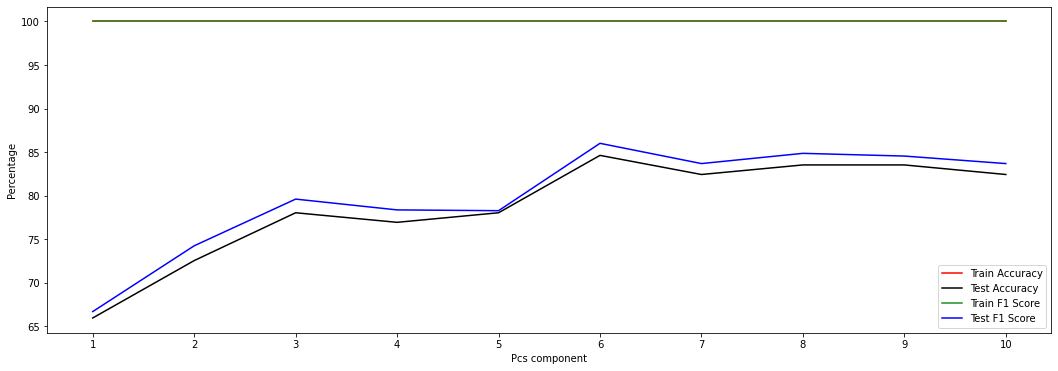

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(range(1,11),evaluation['train_acc'], label='Train Accuracy',color='red')
plt.plot(range(1,11),evaluation['test_acc'], label='Test Accuracy',color='black')
plt.plot(range(1,11),evaluation['f1_train'], label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),evaluation['f1_test'], label='Test F1 Score',color='blue')
plt.xticks(range(1,11))
plt.legend(loc='lower right')
plt.xlabel('Pcs component')
plt.ylabel('Percentage')
plt.show()

In [ ]:
df = evaluation.iloc[evaluation['test_acc'].idxmax()]
best_acc_test = df['test_acc']
best_acc_train = df['train_acc']
best_f1_train = df['f1_train']
best_f1_test = df['f1_test']
best_pcs = evaluation['test_acc'].idxmax() + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best PCs {best_pcs}')
print(f'best  acc test = {best_acc_test} %')
print(f'best  acc train = {best_acc_train} %')
print(f'best  f1 train = {best_f1_train} %')
print(f'best  f1 test = {best_f1_test} %')
print(f'Average Perfomance = {avg} %')

best PCs 6
best  acc test = 84.61538461538461 %
best  acc train = 100.0 %
best  f1 train = 100.0 %
best  f1 test = 85.99999999999999 %
Average Perfomance = 85.30769230769229 %


In [ ]:
df_model_pca = df_model_pca.append({'Algorithm':'Reducted Random Forest','Best PCs':best_pcs,'Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)
df_model_pca

,Algorithm,Best PCs,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
0,Reducted Logistic,6,83.02,85.71,84.35,86.87,86.29
1,Reducted KNN,9,83.02,90.11,84.48,91.26,90.69
2,Reducted Random Forest,6,100.00,84.62,100.00,86.00,85.31


##Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
evaluation = pd.DataFrame()
for i in range(1,11):
  pca = PCA(i)
  ztrain = pca.fit_transform(xtrain)
  ztest = pca.transform(xtest)

  ann = MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=2)
  ann.fit(ztrain,ytrain.values.ravel())

  test_acc = accuracy_score(ytest, ann.predict(ztest)) * 100
  train_acc = accuracy_score(ytrain, ann.predict(ztrain)) * 100
  test_f1_score = f1_score(ytest, ann.predict(ztest)) * 100
  train_f1_score = f1_score(ytrain, ann.predict(ztrain)) * 100

  d = {'train_acc':train_acc,'test_acc':test_acc,'f1_train':train_f1_score,'f1_test':test_f1_score}
  evaluation = evaluation.append(d,ignore_index=True)

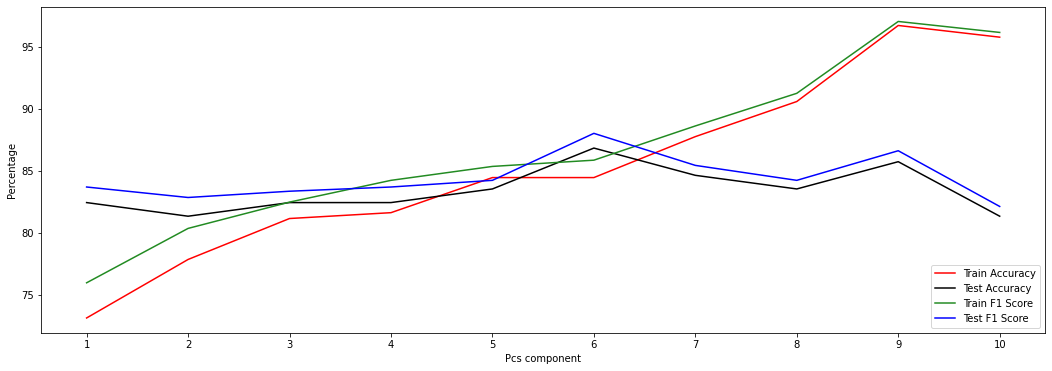

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(range(1,11),evaluation['train_acc'], label='Train Accuracy',color='red')
plt.plot(range(1,11),evaluation['test_acc'], label='Test Accuracy',color='black')
plt.plot(range(1,11),evaluation['f1_train'], label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),evaluation['f1_test'], label='Test F1 Score',color='blue')
plt.xticks(range(1,11))
plt.legend(loc='lower right')
plt.xlabel('Pcs component')
plt.ylabel('Percentage')
plt.show()

In [ ]:
df = evaluation.iloc[evaluation['test_acc'].idxmax()]
best_acc_test = df['test_acc']
best_acc_train = df['train_acc']
best_f1_train = df['f1_train']
best_f1_test = df['f1_test']
best_pcs = evaluation['test_acc'].idxmax() + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best PCs {best_pcs}')
print(f'best  acc test = {best_acc_test} %')
print(f'best  acc train = {best_acc_train} %')
print(f'best  f1 train = {best_f1_train} %')
print(f'best  f1 test = {best_f1_test} %')
print(f'Average Perfomance = {avg} %')

best PCs 6
best  acc test = 86.81318681318682 %
best  acc train = 84.43396226415094 %
best  f1 train = 85.83690987124463 %
best  f1 test = 88.0 %
Average Perfomance = 87.4065934065934 %


In [ ]:
df_model_pca = df_model_pca.append({'Algorithm':'Reducted ANN','Best PCs':best_pcs,'Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)
df_model_pca

,Algorithm,Best PCs,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
0,Reducted Logistic,6,83.02,85.71,84.35,86.87,86.29
1,Reducted KNN,9,83.02,90.11,84.48,91.26,90.69
2,Reducted Random Forest,6,100.00,84.62,100.00,86.00,85.31
3,Reducted ANN,6,84.43,86.81,85.84,88.00,87.41


##NaiveBayes

In [ ]:
evaluation = pd.DataFrame()
for i in range(1,11):
  pca = PCA(i)
  ztrain = pca.fit_transform(xtrain)
  ztest = pca.transform(xtest)

  gnb = GaussianNB(var_smoothing=0.02310129700083159)
  gnb.fit(ztrain,ytrain.values.ravel())

  test_acc = accuracy_score(ytest, gnb.predict(ztest)) * 100
  train_acc = accuracy_score(ytrain, gnb.predict(ztrain)) * 100
  test_f1_score = f1_score(ytest, gnb.predict(ztest)) * 100
  train_f1_score = f1_score(ytrain, gnb.predict(ztrain)) * 100

  d = {'train_acc':train_acc,'test_acc':test_acc,'f1_train':train_f1_score,'f1_test':test_f1_score}
  evaluation = evaluation.append(d,ignore_index=True)

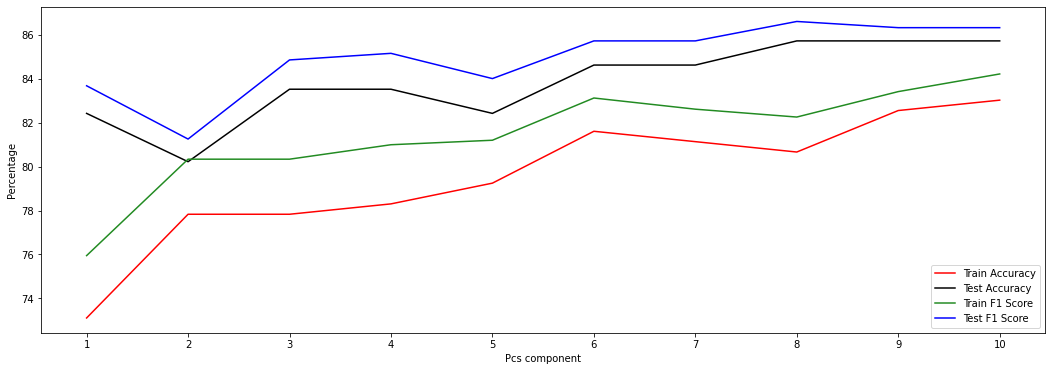

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(range(1,11),evaluation['train_acc'], label='Train Accuracy',color='red')
plt.plot(range(1,11),evaluation['test_acc'], label='Test Accuracy',color='black')
plt.plot(range(1,11),evaluation['f1_train'], label='Train F1 Score',color='forestgreen')
plt.plot(range(1,11),evaluation['f1_test'], label='Test F1 Score',color='blue')
plt.xticks(range(1,11))
plt.legend(loc='lower right')
plt.xlabel('Pcs component')
plt.ylabel('Percentage')
plt.show()

In [ ]:
df = evaluation.iloc[evaluation['test_acc'].idxmax()]
best_acc_test = df['test_acc']
best_acc_train = df['train_acc']
best_f1_train = df['f1_train']
best_f1_test = df['f1_test']
best_pcs = evaluation['test_acc'].idxmax() + 1
avg= (best_acc_test + best_f1_test)/2
print(f'best PCs {best_pcs}')
print(f'best  acc test = {best_acc_test} %')
print(f'best  acc train = {best_acc_train} %')
print(f'best  f1 train = {best_f1_train} %')
print(f'best  f1 test = {best_f1_test} %')
print(f'Average Perfomance = {avg} %')

best PCs 8
best  acc test = 85.71428571428571 %
best  acc train = 80.66037735849056 %
best  f1 train = 82.25108225108225 %
best  f1 test = 86.59793814432989 %
Average Perfomance = 86.1561119293078 %


In [ ]:
df_model_pca = df_model_pca.append({'Algorithm':'Reducted Naive Bayes','Best PCs':best_pcs,'Accuracy Training(%)':best_acc_train,'Accuracy Testing(%)':best_acc_test,
                  'F1 Score Training(%)':best_f1_train,'F1 Score Testing(%)':best_f1_test,'Avg Perfomance':avg},ignore_index=True)


In [ ]:
df_model_hypertuning = df_model_hypertuning.sort_values(by=['Avg Perfomance'], ascending=False)
df_model_pca = df_model_pca.sort_values(by=['Avg Perfomance'], ascending=False)


#Perfomance Comparison

In [ ]:
display(df_model.sort_values(by=['Accuracy Testing(%)'], ascending=False))
print("")
print("Dengan Hyper Parameter Tuning")
display(df_model_hypertuning)
print("")
print("Dengan Dimentionality Reduction")
display(df_model_pca)

,Algorithm,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%)
1,KNN,86.79,86.81,87.93,88.00
3,ANN,94.34,86.81,94.83,88.46
0,Logistic Regression,86.79,85.71,88.14,87.38
2,Random Forest,100.00,82.42,100.00,84.00
4,Naive Bayes,77.36,68.13,75.00,63.29



Dengan Hyper Parameter Tuning


,Algorithm,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
1,Tuned KNN,84.43,89.01,86.31,90.38,89.70
3,Tuned ANN,92.45,87.91,93.10,89.32,88.62
0,Tuned Logistic Regression,86.79,86.81,88.14,88.24,87.52
2,Tuned Random Forest,100.00,84.62,100.00,86.00,85.31
4,Tuned Naive Bayes,85.38,84.62,86.81,86.00,85.31



Dengan Dimentionality Reduction


,Algorithm,Best PCs,Accuracy Training(%),Accuracy Testing(%),F1 Score Training(%),F1 Score Testing(%),Avg Perfomance
1,Reducted KNN,9,83.02,90.11,84.48,91.26,90.69
3,Reducted ANN,6,84.43,86.81,85.84,88.00,87.41
0,Reducted Logistic,6,83.02,85.71,84.35,86.87,86.29
4,Reducted Naive Bayes,8,80.66,85.71,82.25,86.60,86.16
2,Reducted Random Forest,6,100.00,84.62,100.00,86.00,85.31


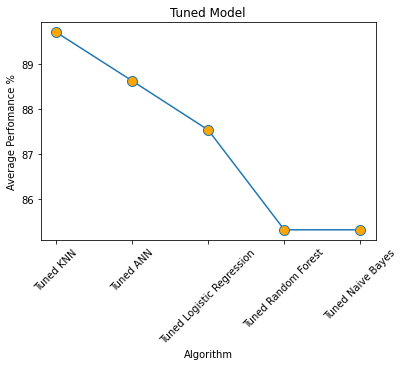

In [ ]:
plt.plot(df_model_hypertuning['Algorithm'], df_model_hypertuning['Avg Perfomance'], 'o-',mfc='orange', ms=10)
plt.xticks(df_model_hypertuning['Algorithm'], rotation=45)
plt.xlabel('Algorithm')
plt.ylabel('Average Perfomance %')
plt.title('Tuned Model')
plt.show()

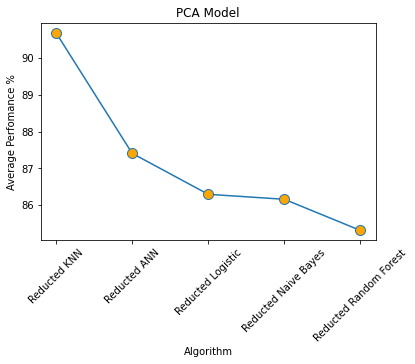

In [ ]:
plt.plot(df_model_pca['Algorithm'], df_model_pca['Avg Perfomance'], 'o-',mfc='orange', ms=10)
plt.xticks(df_model_pca['Algorithm'], rotation=45)
plt.xlabel('Algorithm')
plt.ylabel('Average Perfomance %')
plt.title('PCA Model')
plt.show()